### **Dataset-Sales Data** -
We'll simulate a realistic sales dataset

Descriptive Statistics:
         Units_Sold   Unit_Price  Total_Sales
count  1000.000000  1000.000000  1000.000000
mean     19.977000    53.900860  1076.889930
std       4.333734    25.762521   572.274807
min       7.000000    10.190000   127.320000
25%      17.000000    31.607500   611.527500
50%      20.000000    53.855000  1013.610000
75%      23.000000    76.045000  1497.280000
max      35.000000    99.910000  2971.350000


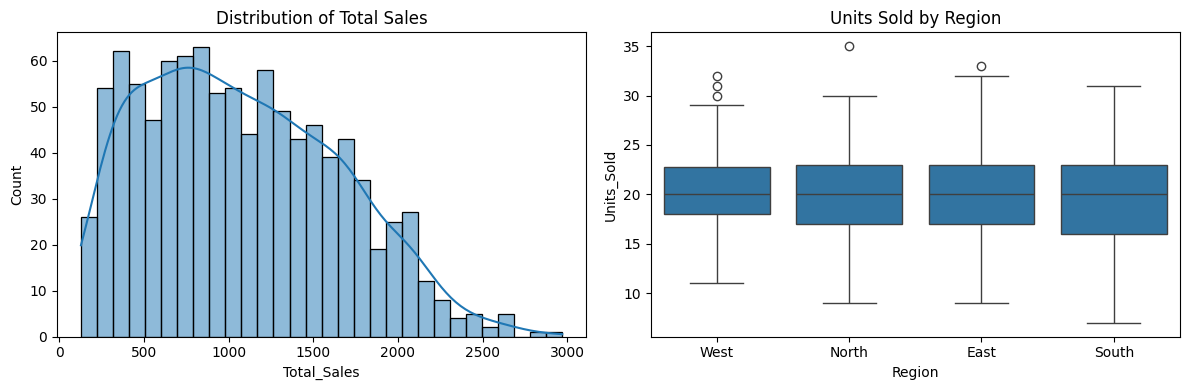

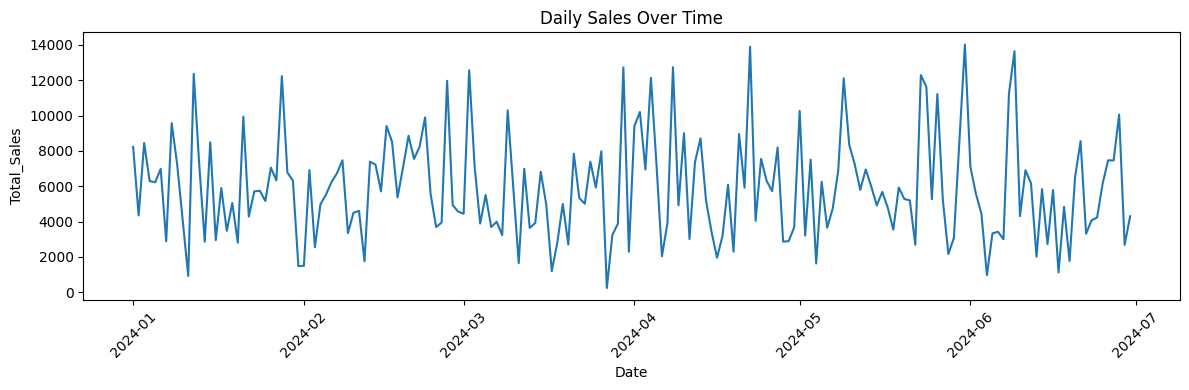

Correlation Matrix:
              Units_Sold  Unit_Price  Total_Sales
Units_Sold     1.000000    0.001008     0.398942
Unit_Price     0.001008    1.000000     0.895998
Total_Sales    0.398942    0.895998     1.000000


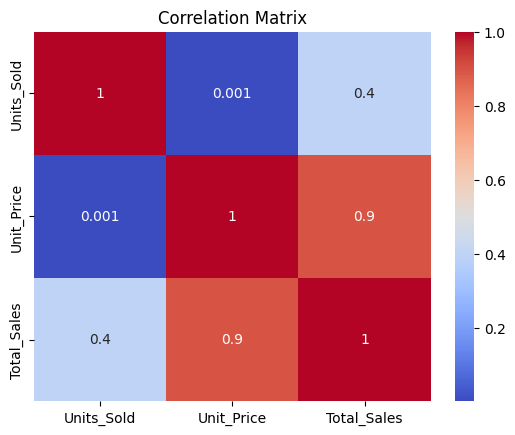

Sales by Region:
               sum     mean     std
Region                            
East    289447.31  1096.39  572.16
North   255660.81  1074.21  561.82
South   270140.58  1055.24  607.36
West    261641.23  1081.16  546.49


/tmp/ipython-input-1-1638201296.py:62: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Total_Sales'].sum()


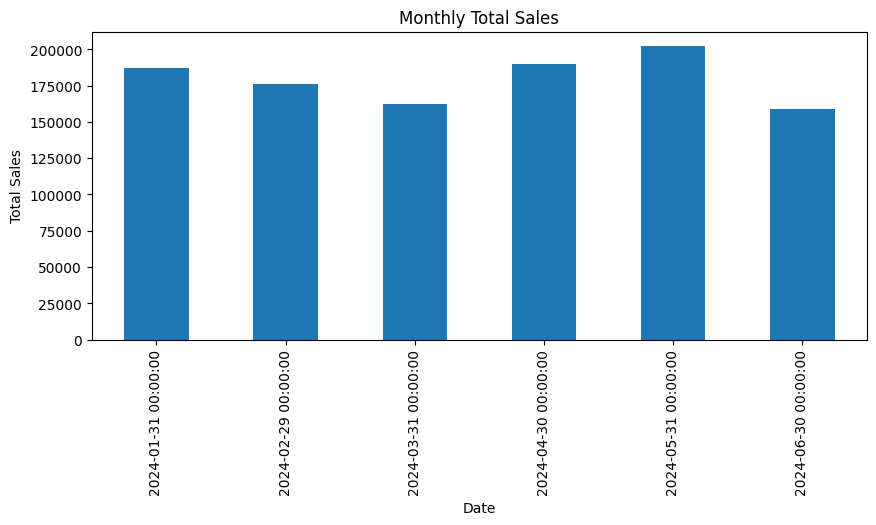

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Simulate sales data
dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
data = {
    'Date': np.random.choice(dates, size=1000),
    'Store_ID': np.random.randint(1, 11, 1000),
    'Product_ID': np.random.randint(100, 120, 1000),
    'Units_Sold': np.random.poisson(lam=20, size=1000),
    'Unit_Price': np.round(np.random.uniform(10, 100, size=1000), 2),
    'Region': np.random.choice(['North', 'East', 'South', 'West'], size=1000)
}

df = pd.DataFrame(data)
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']

# --- Descriptive Statistics ---
desc = df[['Units_Sold', 'Unit_Price', 'Total_Sales']].describe()
print("Descriptive Statistics:\n", desc)

# --- Distribution ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.title("Distribution of Total Sales")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Region', y='Units_Sold')
plt.title("Units Sold by Region")
plt.tight_layout()
plt.show()

# --- Time Series Analysis ---
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(12, 4))
sns.lineplot(data=daily_sales, x='Date', y='Total_Sales')
plt.title("Daily Sales Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Correlation Analysis ---
corr_matrix = df[['Units_Sold', 'Unit_Price', 'Total_Sales']].corr()
print("Correlation Matrix:\n", corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# --- Group-Level Analysis ---
sales_by_region = df.groupby('Region')['Total_Sales'].agg(['sum', 'mean', 'std']).round(2)
print("Sales by Region:\n", sales_by_region)

monthly_sales = df.resample('M', on='Date')['Total_Sales'].sum()
monthly_sales.plot(kind='bar', figsize=(10, 4), title='Monthly Total Sales')
plt.ylabel("Total Sales")
plt.show()


Updated code to include product_category

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
np.random.seed(42)

# Generate date range
dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')

# Sample product categories
categories = ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Toys']

# Create the dataset
data = {
    'Date': np.random.choice(dates, size=1000),
    'Store_ID': np.random.randint(1, 11, 1000),
    'Product_ID': np.random.randint(100, 120, 1000),
    'Product_Category': np.random.choice(categories, size=1000),
    'Units_Sold': np.random.poisson(lam=20, size=1000),
    'Unit_Price': np.round(np.random.uniform(10, 100, size=1000), 2),
    'Region': np.random.choice(['North', 'East', 'South', 'West'], size=1000)
}

# Create DataFrame
df = pd.DataFrame(data)
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']
df['Date'] = pd.to_datetime(df['Date'])

# Preview
df.head()


,Date,Store_ID,Product_ID,Product_Category,Units_Sold,Unit_Price,Region,Total_Sales
0,2024-04-12,2,110,Groceries,20,37.62,West,752.40
1,2024-06-28,5,115,Furniture,18,15.14,North,272.52
2,2024-04-02,8,114,Groceries,20,40.87,North,817.40
3,2024-01-15,9,114,Toys,21,70.02,North,1470.42
4,2024-04-16,2,103,Electronics,23,19.23,South,442.29


#Advanced EDA & Feature Engineering

                  Total Revenue  Average Revenue  Transactions
Product_Category                                              
Clothing              231227.04          1117.04           207
Electronics           235431.45          1121.10           210
Furniture             227035.20          1135.18           200
Groceries             197882.44          1069.63           185
Toys                  202609.59          1023.28           198


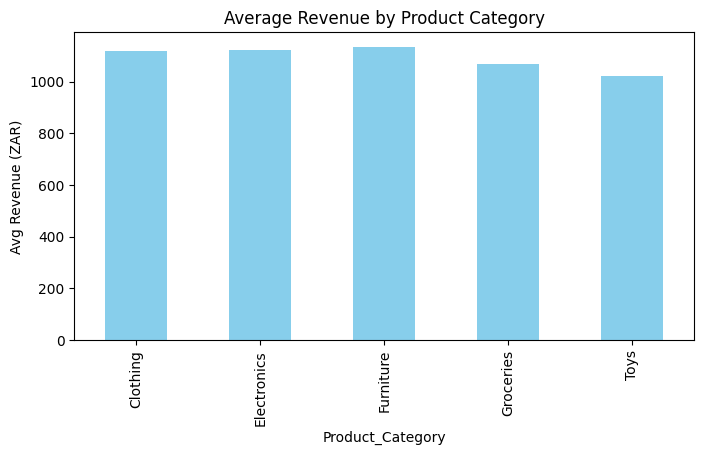

In [3]:
# 1. Average Revenue by Product
category_revenue = df.groupby('Product_Category')['Total_Sales'].agg(['sum', 'mean', 'count']).round(2)
category_revenue.columns = ['Total Revenue', 'Average Revenue', 'Transactions']
print(category_revenue)

category_revenue['Average Revenue'].plot(kind='bar', title='Average Revenue by Product Category', figsize=(8, 4), color='skyblue')
plt.ylabel('Avg Revenue (ZAR)')
plt.show()


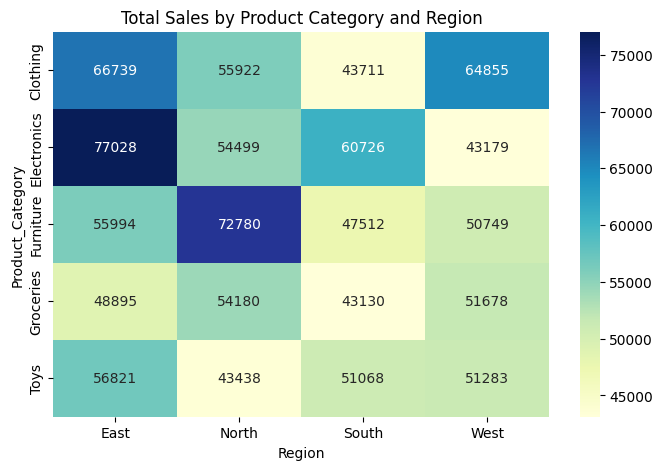

In [4]:
# 2.Sales Patterns by Category & Region (Heatmap)
pivot = df.pivot_table(index='Product_Category', columns='Region', values='Total_Sales', aggfunc='sum')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Sales by Product Category and Region")
plt.show()


In [5]:
# Feature Engineering
#3.1 Add Avg Sale per Unit
df['Avg_Sale_Per_Unit'] = df['Total_Sales'] / df['Units_Sold']

# 3.2 Store-level revenue
store_rev = df.groupby('Store_ID')['Total_Sales'].sum().rename('Revenue_Per_Store')
df = df.merge(store_rev, on='Store_ID')

# 3.3 Store + Category average units sold
store_cat = df.groupby(['Store_ID', 'Product_Category'])['Units_Sold'].mean().rename('Avg_Units_Per_Store_Category').reset_index()
df = df.merge(store_cat, on=['Store_ID', 'Product_Category'])

# Preview engineered columns
df[['Store_ID', 'Product_Category', 'Units_Sold', 'Avg_Sale_Per_Unit', 'Revenue_Per_Store', 'Avg_Units_Per_Store_Category']].head()


,Store_ID,Product_Category,Units_Sold,Avg_Sale_Per_Unit,Revenue_Per_Store,Avg_Units_Per_Store_Category
0,2,Groceries,20,37.62,108554.66,19.208333
1,5,Furniture,18,15.14,114194.43,21.956522
2,8,Groceries,20,40.87,106194.37,18.619048
3,9,Toys,21,70.02,124387.96,20.038462
4,2,Electronics,23,19.23,108554.66,19.000000


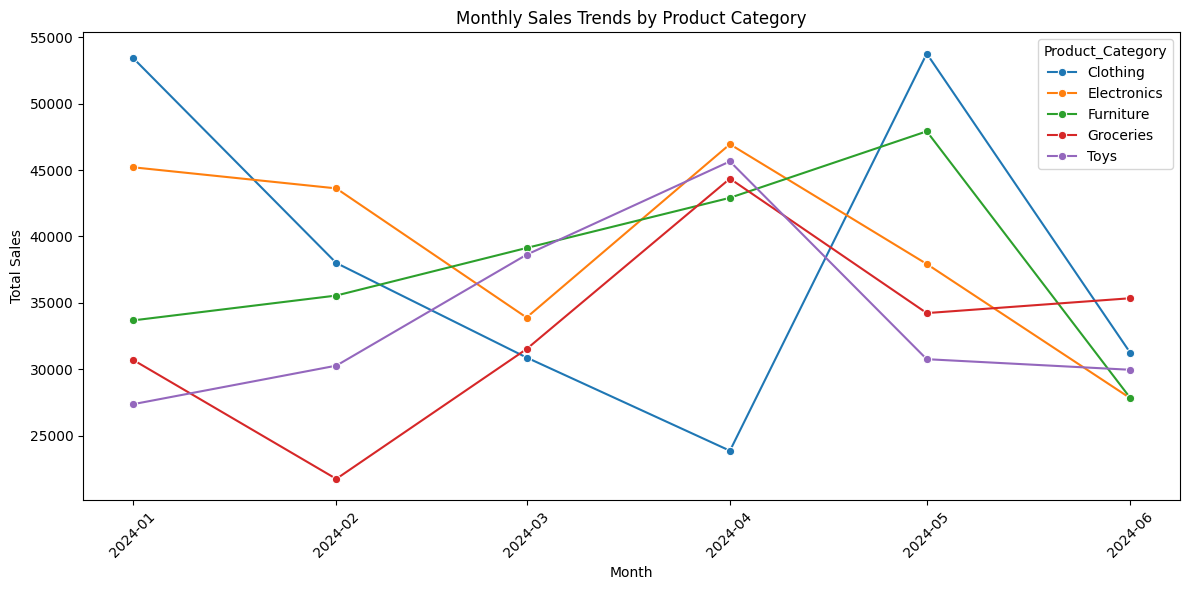

In [6]:
#  4. Time-Series Trends per Category
# Group by Month and Category
df['Month'] = df['Date'].dt.to_period('M')
monthly_category = df.groupby(['Month', 'Product_Category'])['Total_Sales'].sum().reset_index()

# Convert Month back to datetime for plotting
monthly_category['Month'] = monthly_category['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_category, x='Month', y='Total_Sales', hue='Product_Category', marker='o')
plt.title("Monthly Sales Trends by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


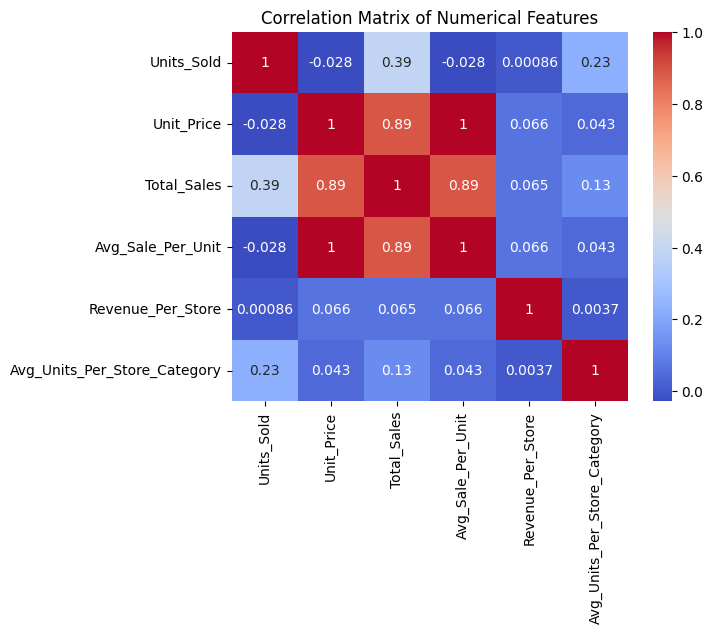

In [7]:
#Correlation Analysis
corr = df[['Units_Sold', 'Unit_Price', 'Total_Sales', 'Avg_Sale_Per_Unit', 'Revenue_Per_Store', 'Avg_Units_Per_Store_Category']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Topic 2: Random Sampling

In [8]:
#1. Simple Random Sampling
# Sample 10% of the full dataset
sample_random = df.sample(frac=0.10, random_state=42)
print(f"Random Sample Size: {len(sample_random)}")


Random Sample Size: 100


In [9]:
#compare the average revenue in this sample vs full data
print("Mean Total Sales (Population):", df['Total_Sales'].mean())
print("Mean Total Sales (Sample):", sample_random['Total_Sales'].mean())


Mean Total Sales (Population): 1094.18572
Mean Total Sales (Sample): 1113.0664


In [10]:
# 2. Stratified Sampling by Region
# Sample 10% within each region (stratified)
sample_stratified = df.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.10, random_state=42))

print("Stratified Sample Size:", len(sample_stratified))
print("Proportion by Region (Population):")
print(df['Region'].value_counts(normalize=True))

print("\nProportion by Region (Stratified Sample):")
print(sample_stratified['Region'].value_counts(normalize=True))


Stratified Sample Size: 99
Proportion by Region (Population):
Region
East     0.264
North    0.261
West     0.243
South    0.232
Name: proportion, dtype: float64

Proportion by Region (Stratified Sample):
Region
East     0.262626
North    0.262626
West     0.242424
South    0.232323
Name: proportion, dtype: float64


/tmp/ipython-input-10-4158125187.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_stratified = df.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.10, random_state=42))


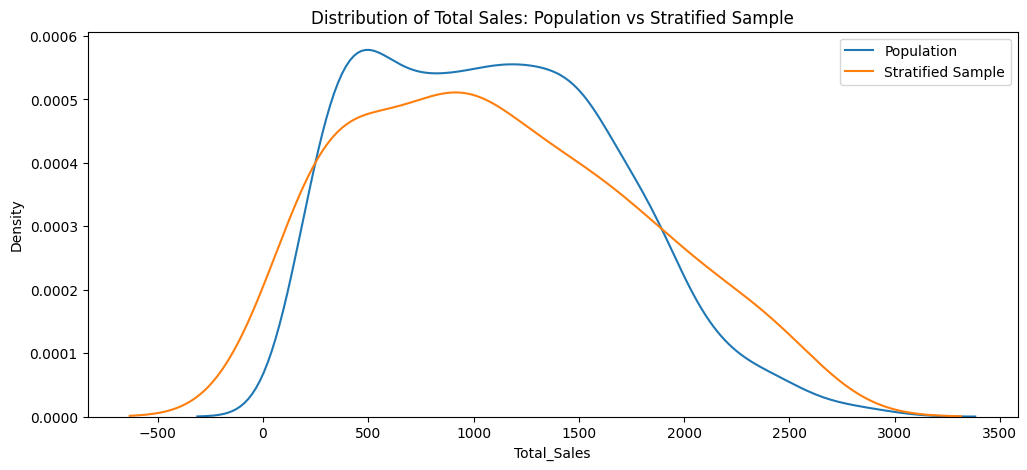

In [11]:
# Compare Distributions
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Total_Sales'], label='Population')
sns.kdeplot(sample_stratified['Total_Sales'], label='Stratified Sample')
plt.legend()
plt.title("Distribution of Total Sales: Population vs Stratified Sample")
plt.show()


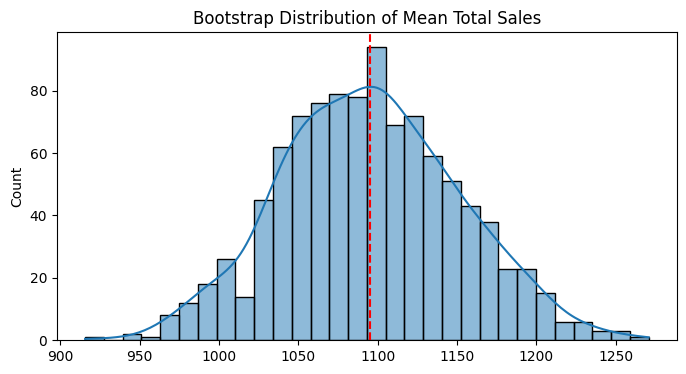

95% CI for Mean Sales: (987.53, 1206.09)


In [12]:
#Bootstrap Resampling
# This is useful if you want to estimate a confidence interval for the mean.
bootstrap_means = []

for _ in range(1000):
    boot = df.sample(frac=0.10, replace=True)
    bootstrap_means.append(boot['Total_Sales'].mean())

plt.figure(figsize=(8, 4))
sns.histplot(bootstrap_means, bins=30, kde=True)
plt.title("Bootstrap Distribution of Mean Total Sales")
plt.axvline(np.mean(bootstrap_means), color='red', linestyle='--')
plt.show()

# Confidence Interval
ci_low = np.percentile(bootstrap_means, 2.5)
ci_high = np.percentile(bootstrap_means, 97.5)
print(f"95% CI for Mean Sales: ({ci_low:.2f}, {ci_high:.2f})")


### Simulation: Promo Campaign Experiment (A/B Test Style)

Simulate a promotional campaign where some stores get a discount (Treatment group) and others don’t (Control group), then analyze if the promo caused an increase in total sales.

In [14]:
#  Step 1: Add Promo Treatment Column
# Create a new column: 1 = promo applied, 0 = no promo
unique_stores = df['Store_ID'].unique()
treated_stores = np.random.choice(unique_stores, size=len(unique_stores)//2, replace=False)

df['Treatment'] = df['Store_ID'].apply(lambda x: 1 if x in treated_stores else 0)


In [16]:
# Step 2: Simulate Promo Effect (We’ll boost Total_Sales by 10% for the treatment group to simulate a promo effect)
# Apply 10% increase to treated stores (simulate effect)
df['Adjusted_Sales'] = df.apply(
    lambda row: row['Total_Sales'] * 1.10 if row['Treatment'] == 1 else row['Total_Sales'],
    axis=1
)


In [17]:
# Step 3: Compare Results (Control vs Treatment)
results = df.groupby('Treatment')['Adjusted_Sales'].agg(['mean', 'std', 'count']).round(2)
results.index = ['Control', 'Treatment']
print("Group Comparison:\n", results)


Group Comparison:
               mean     std  count
Control    1100.14  588.79    504
Treatment  1196.95  624.91    496


/tmp/ipython-input-18-3811928118.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Treatment', y='Adjusted_Sales', estimator=np.mean, ci='sd')


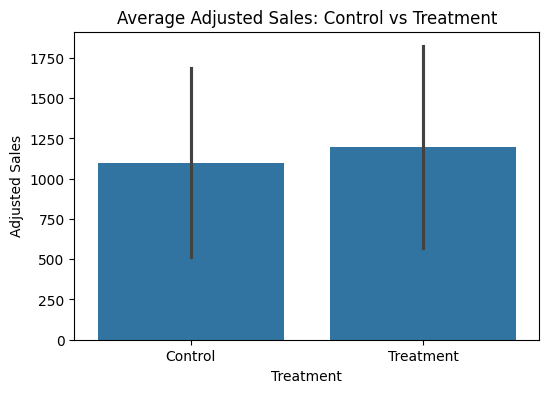

In [18]:
#Plotting the difference
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Treatment', y='Adjusted_Sales', estimator=np.mean, ci='sd')
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.title("Average Adjusted Sales: Control vs Treatment")
plt.ylabel("Adjusted Sales")
plt.show()


In [19]:
#Step 4: Statistical Test (Independent T-Test)
from scipy.stats import ttest_ind

control_sales = df[df['Treatment'] == 0]['Adjusted_Sales']
treatment_sales = df[df['Treatment'] == 1]['Adjusted_Sales']

t_stat, p_value = ttest_ind(treatment_sales, control_sales, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Result is statistically significant (promo had an effect).")
else:
    print("❌ No statistically significant effect detected.")


T-statistic: 2.521
P-value: 0.0119
✅ Result is statistically significant (promo had an effect).


## Topic 4: Regression — Predict & Understand Relationships

Use regression to:

Predict Total Sales based on product, price, and region

Understand which variables explain changes in sales

Detect anomalies (sales way above/below expected)

**Step 1: What Is Linear Regression?**
What Is Linear Regression?
 Formula:
𝑦
^
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
⋯
+
𝛽
𝑛
𝑥
𝑛
y
^
​
 =β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +⋯+β
n
​
 x
n
​


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Region'], drop_first=True)

# Define X (features) and y (target)
features = ['Units_Sold', 'Unit_Price'] + [col for col in df_encoded.columns if col.startswith('Product_Category_') or col.startswith('Region_')]
X = df_encoded[features]
y = df_encoded['Adjusted_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Step 2: Fit the Model
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [22]:
# Step 3: Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.949
RMSE: 138.18


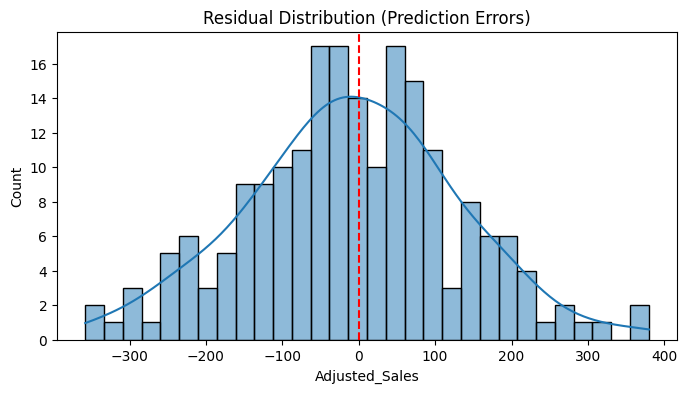

Top 5 Anomalies:
       Actual    Predicted    Residual  Abs_Residual
20   2734.05  2354.265450  379.784550    379.784550
28   2708.75  2331.051538  377.698462    377.698462
196   329.94   688.015786 -358.075786    358.075786
137   664.97  1022.423711 -357.453711    357.453711
67   2947.12  2630.321836  316.798164    316.798164


In [23]:
# Step 4: Residual Analysis (Anomaly Detection)
# Add residuals to test set
residuals = y_test - y_pred
residuals_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
}).reset_index(drop=True)

# Plot residuals
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution (Prediction Errors)")
plt.show()

# Find largest anomalies
residuals_df['Abs_Residual'] = residuals_df['Residual'].abs()
anomalies = residuals_df.sort_values(by='Abs_Residual', ascending=False).head(5)
print("Top 5 Anomalies:\n", anomalies)


In [24]:
# Step 5: Coefficients = Insights
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coef_df)


                        Feature  Coefficient
0                    Units_Sold    59.063202
1                    Unit_Price    20.550928
6                  Region_North    -3.818917
8                   Region_West    -7.664850
7                  Region_South    -7.822972
5         Product_Category_Toys   -18.703393
3    Product_Category_Furniture   -21.742188
2  Product_Category_Electronics   -23.100648
4    Product_Category_Groceries   -29.895179


### Classification
**Step 1**: Create the Classification Target (High_Revenue)
You’ll create a binary column by checking whether Adjusted_Sales is greater than the median.

In [25]:


# Assuming df is your main DataFrame and 'Adjusted_Sales' already exists
median_sales = df['Adjusted_Sales'].median()

# Create a binary target column
df['High_Revenue'] = (df['Adjusted_Sales'] > median_sales).astype(int)

# Quick check
df['High_Revenue'].value_counts()


,count
High_Revenue,
0,500
1,500


In [26]:
#Step 2: Prepare the Feature Matrix and Target
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Region'], drop_first=True)

# Define features and target
features = ['Units_Sold', 'Unit_Price'] + \
           [col for col in df_encoded.columns if 'Product_Category_' in col or 'Region_' in col]
X = df_encoded[features]
y = df_encoded['High_Revenue']


In [27]:
#Step 3: Train a Simple Classifier (Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[103   6]
 [  4  87]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           1       0.94      0.96      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



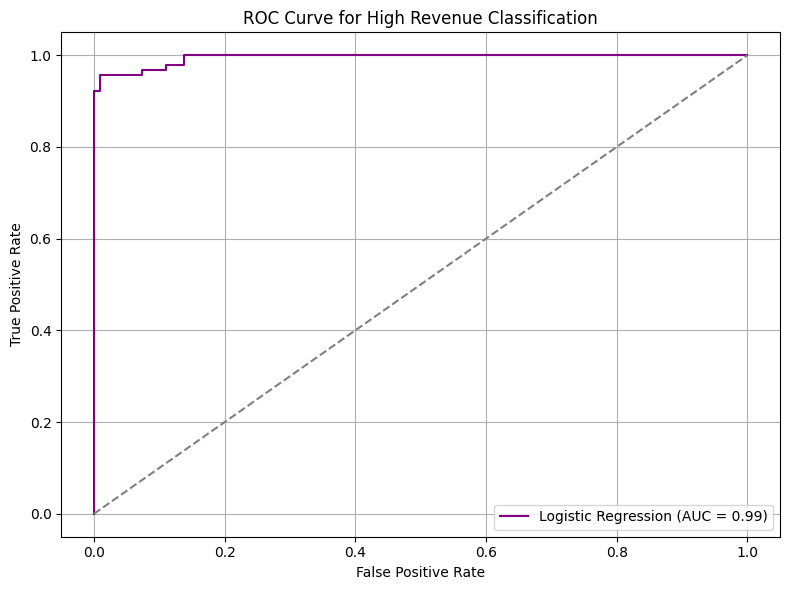

In [29]:
# Step 4: Optional — ROC Curve & Feature Importance
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities instead of hard classes
y_probs = model.predict_proba(X_test)[:, 1]  # probability of class 1 (High Revenue)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for High Revenue Classification')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Statistical Machine Learning

# 1) Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize and train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       109
           1       0.86      0.91      0.89        91

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



2) K-Nearest Neighbors (KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the KNN model (let’s start with k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.97      0.97      0.97        91

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



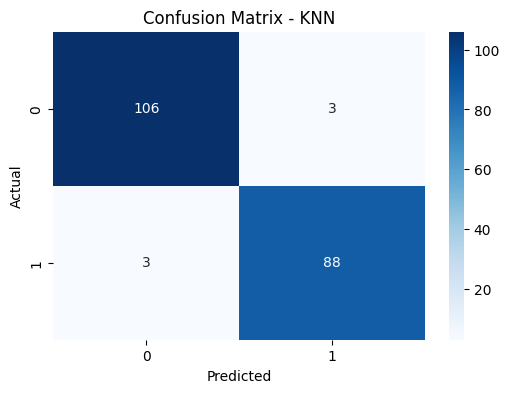

In [32]:
#Confusion Matrix Heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
